<font color='red'> 
# Computational Statistics for Data Analysis
<font\>

# <div class="alert alert-error"><strong><center><small>Statistics is the discipline of using data samples to support claims about populations.<small></center></strong> </div>

# Statistics is based on 2 main concepts: #

* A **population** is a collection of objects, items (“units”) about which information is sought.

* A **sample** is a part of the population that is observed.

# Index

### 1 Descriptive Statistics.
* 1.1 Getting data
* 1.2 Data preparation
* 1.3 Improving data as a pandas DataFrame
* 1.4 Data cleaning and preparation
 

### 2 Exploratory Data Analysis.
* 2.1 Summarizing the data: mean, variance, median, quantiles & percentiles
* 2.2 Histogram
* 2.3 Data distributions
    * 2.3.1 PMF
    * 2.3.2 CDF
* 2.4 Outliers
* 2.5 Measuring asymmetry
    * 2.5.1 Skewness
    * 2.5.2 Pearson's median skewness coefficient
* 2.6 Relative risk
* 2.7 A firts glimpse to Conditional Probability


### 3 Probabilities. 
* 3.1 Probability rules
* 3.2 Binomial distribution
* 3.3 Monte Carlo


<center><img src="images/taft_puck_eggdig.jpg">
</center><center><img src="images/eggs.png"></center>
<center><small>Headline from Chicago Tribune June 13, 1897.</small></center>

Read more: "http://ptara.com/2011/12/17/never-eat-eggs-with-an-angry-stomach/"

### "Do firts babies arrive late?"

***From [Think Stats: Probability and Statistics for Programmers](http://www.greenteapress.com/thinkstats/), by Allen B. Downey, published by O'Reilly Media.***

Some people believe it is true, but **without data analysis** to support it, this claim is a case of *anecdotal evidence*:

* There are a *small number of samples* (personal experience, friends, etc.).
* There is a *selection bias*: most *believers* are interested in this claim because their first babies were late.
* There is a *confirmation bias*: believers might be more likely to contribute data that confirm it.
* Sources are *innaccurate*: personal stories are subject to memory deformations. 



<font color='blue'>
# 1 Descriptive Statistics.
* 1.1 Getting data
* 1.2 Data preparation
* 1.3 Improving data as a pandas DataFrame
* 1.4 Data cleaning 
 <font\>

## 1.1 Getting Data

There is an interesting and publicly available **data source** to check the claim of babies arrival. Since 1973 the U.S. Centers for Disease Control and Prevention (CDC) have conducted a survey, the National Survey of Family Growth (NSFG), to gather *information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health.* 

Data can be downloaded from: 

http://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm#cyc6downdatafiles

We will use this file: 

* Female Pregnancy Data File (2002FemPreg.dat): one record for each pregnancy reported by a respondent.

There are 13593 pregnancies in our data. The meaning of the data is (each record is in a line):

+ <code>case.id</code> is the ID of the respondent. From col 1 to 12.
+ <code>prg.lenght</code> is the duration of the pregnancy in weeks. From col 275 to 276. 
+ <code>outcome</code> is the outcome of the pregnancy (1 = live birth). Col 277.
+ <code>birth.ord</code> is the integer birth order of each live birth. From col 278 to 279.


<small> If curious: Online documentation of the survey is at http://www.icpsr.umich.edu/nsfg6.<small> 

### 1.2 Data preparation

One of the reasons we are using a general-purpose language such as Python rather than a stats language like R is that for many projects the *hard* part is preparing the data, not doing the analysis.

The most common steps are:

1. **Getting the data**. Data can be directly read from a file or it might be necessary to scrap the web.
2. **Parsing the data**.  Of course, this depends on what format it is in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**.  Survey responses and other data files are almost always incomplete.  Sometimes there are multiple codes for things like, *not asked*, *did not know*, and *declined to answer*. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**. Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do.

If the data fits into memory, building a data structure is usually the way to go.   If not, you could build a **database**, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.

In [4]:
file = open('files/2002FemPreg.dat', 'r')

# Let's build a list of lists.

preg=[]
for line in file:
    preg.append([int(line[:12]), int(line[274:276]), int(line[276]),
                 int(line[277:279])])

ValueError: invalid literal for int() with base 10: '  '

Ooops! There is something wrong in the data file!

By inspecting the data we can observe that there are some empty records that caused an error to the ``int`` function.

In [5]:
file = open('files/2002FemPreg.dat', 'r')

def chr_int(a):
    if a == '  ':
        return 0
    else:
        return int(a)
        
preg=[]
for line in file:
    lst  = [int(line[:12]), int(line[274:276]), int(line[276]), \
                 chr_int(line[277:279])]
    preg.append(lst)

In [6]:
print(preg[1])
print('The number of entries is: ', len(preg))

[1, 39, 1, 2]
The number of entries is:  13593


### 1.3 Importing data as a pandas DataFrame

In [7]:
%matplotlib inline

import pandas as pd
df = pd.DataFrame(preg) #  Two-dimensional size-mutable, potentially heterogeneous tabular 
        #data structure with labeled axes 
    
df.columns = ['caseId', 'prgLength', 'outcome', 'birthOrd']
df.head()

,caseId,prgLength,outcome,birthOrd
0,1,39,1,1
1,1,39,1,2
2,2,39,1,1
3,2,39,1,2
4,2,39,1,3


In [8]:
counts = df.groupby('birthOrd').size()
print('The number of first babies is: ',counts[1])
print('Number of babies according to their order: ',counts) 

# also: df.outcome.value_counts()

The number of first babies is:  4413
Number of babies according to their order:  birthOrd
0     4445
1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64


Let's count the number of  births according to the order.

Let's build a partition of *live births* into two groups: first babies and others.

In [9]:
# Divide records into two lists: first babies and others.

firstbirth = df[ (df.outcome == 1) & (df.birthOrd == 1)]
print('The number of first babies is: ', firstbirth.shape[0])

The number of first babies is:  4413


In [10]:
othersbirth = df[(df.outcome == 1) & (df.birthOrd >= 2)]
print('The number of others babies is: ', othersbirth.shape[0])

The number of others babies is:  4735


### 1.4 Data Cleaning

The most common steps are:

+ **Sample the data**. If the amount of raw data is huge, processing all of them may require an extensive amount of processing power which may not be practical.  


+ **Impute missing data**. It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error.  Validate the format and value! 

In case of fields missing: 
<small>
* (a) Discard the whole record if it is incomplete; 
* (b) Infer the missing value based on the data from other records (fill the missing data with the average or the median).
<small>



+ **Normalize numeric value**. Normalize data is about transforming numeric data into a uniform range.
+ **Reduce dimensionality**. High dimensionality can be a problem for some machine learning methods.  There are two ways to reduce the number of input features.  One is about $removing$ $irrelevant$ input variables, another one is about $removing$ $redundant$ input variables.
+ **Add derived features**. In some cases, we may need to compute additional attributes from existing attributes (f.e. converting a geo-location to a zip code, or converting the age to an age group).
+ **Discretize numeric value into categories**. Discretize data is about cutting a continuous value into ranges and assigning the numeric with the corresponding bucket of the range it falls on.  For numeric attribute, a common way to generalize it is to discretize it into ranges, which can be either constant width (variable height/frequency) or variable width (constant height).
+ **Binarize categorical attributes**. Certain machine learning models only take binary input (or numeric input).  In this case, we need to convert categorical attribute into multiple binary attributes, while each binary attribute corresponds to a particular value of the category. 

+ **Select, combine, aggregate data**. Designing the form of training data is the most important part of the whole predictive modeling exercise because the accuracy largely depends on whether the input features are structured in an appropriate form that provide strong signals to the learning algorithm. Rather than using the raw data as it is, it is quite common that multiple pieces of raw data need to be combined together, or aggregating multiple raw data records along some dimensions.

<font color='blue'>
## 2 Exploratory Data Analysis.
* 2.1 Summariizing the data: mean, variance, median, quantiles & percentiles
* 2.2 Histogram
* 2.3 Data distributions
* 2.3.1 PMF
* 2.3.2 CDF
* 2.4 Outliers
* 2.5 Measuring asymmetry
* 2.5.1 Skewness
* 2.5.2 Pearson's median skewness coefficient
* 2.6 Relative risk
* 2.7 A firts glimpse to Conditional Probability
<font\>

### 2.1 Summarizing the data: 
#### 2.1.1 Sample Mean 

If you have a sample of $n$ values, $x_i$, the **sample mean** is the sum of the values divided by the number of values:

$$ \mu = \frac{1}{n} \sum_i x_i$$

The **mean** is the most basic and important summary statistic. It describes the central tendency of a sample. 

Let's see if there is a difference between firstbirth and othersbirth:

In [11]:
print('The mean of the first birth is: ', firstbirth['prgLength'].mean())
print('The mean of the non first birth is: ', othersbirth['prgLength'].mean())

The mean of the first birth is:  38.60095173351461
The mean of the non first birth is:  38.52291446673706


In [12]:
print(abs(firstbirth['prgLength'].mean()-
          othersbirth['prgLength'].mean()),"weeks")

0.07803726677754952 weeks


In [13]:
print(abs(firstbirth['prgLength'].mean()-
          othersbirth['prgLength'].mean())*7,"days")

0.5462608674428466 days


In [14]:
print(abs(firstbirth['prgLength'].mean()-
          othersbirth['prgLength'].mean())*7*24, "hours")

13.11026081862832 hours


This difference in sample means can be considered a first evidence of our hypothesis!


**Comment: ** Do not confuse both concepts: the population mean and the sample mean.  The first one is the mean of samples taken from the population and the second one is the mean of the whole population.

#### 2.1.2 Sample Variance

Usually, mean is not a sufficient descriptor of the data, we can do a little better with two numbers: mean and **variance**:

$$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

**Variance** $\sigma^2$ describes the *spread* of data. The term $(x_i - \mu)$ is called the *deviation from the mean*, so variance is the mean squared deviation.

The square root of variance, $\sigma$, is called the **standard deviation**. We define standard deviation because variance is hard to interpret (in the case the units are grams, the variance is in grams squared).


In [15]:
mu1 = firstbirth['prgLength'].mean()
mu2 = othersbirth['prgLength'].mean()
var1 = firstbirth['prgLength'].var()
var2 = othersbirth['prgLength'].var()
std1 = firstbirth['prgLength'].std()
std2 = othersbirth['prgLength'].std()
print('Firstbirth mu1:', mu1, 'var1:', var1, 'std1:', std1)
print('Othersbirhts mu2:', mu2, 'var2:', var2, 'std2:', std2)

Firstbirth mu1: 38.60095173351461 var1: 7.794713509229059 std1: 2.7919014146686947
Othersbirhts mu2: 38.52291446673706 var2: 6.842683519298573 std2: 2.615852350439255


#### 2.1.3 Sample Median

The statistical median is an order statistic that gives the *middle* value of a sample. It is a value more robust to ouliers.

In [16]:
firstbirthmedian= firstbirth['prgLength'].median()
othersbirthmedian= othersbirth['prgLength'].median()
print('The median measures of both first- and otherbirths are: ', 
      firstbirthmedian, othersbirthmedian)

The median measures of both first- and otherbirths are:  39.0 39.0


<center><img src="images/mean_median.gif">

#### 2.1.4 Summarizing the data: Quantiles & Percentiles

Order the sample $\{ x_i \}$, then find $x_p$ so that it divides the data into two parts where:

+ a fraction $p$ of the data values are less than or equal to $x_p$ and
+ the remaining fraction $(1 − p)$ are greater than $x_p$.

That value $x_p$ is the pth-quantile, or 100×pth percentile.

**5-number summary**: $x_{min}, Q_1, Q_2, Q_3, x_{max}$, where $Q_1$ is the 25×pth percentile,
$Q_2$ is the 50×pth percentile and $Q_3$ is the 75×pth percentile.

### 2.2 Histogram

The most common representation of a distribution is a **histogram**, which is a graph that shows the frequency of each value.

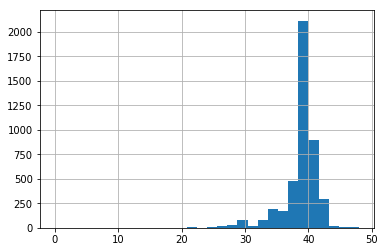

In [17]:
fb=firstbirth['prgLength']

fb.hist(normed=0, histtype='stepfilled', bins=30)

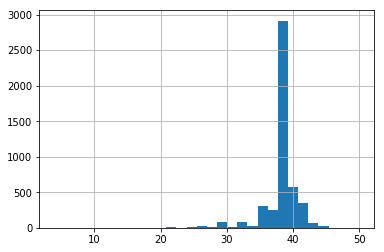

In [18]:
        
ob=othersbirth['prgLength']
ob.hist(normed=0, histtype='stepfilled', bins=30)

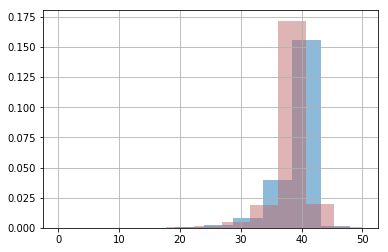

In [19]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fb.hist(normed=1, histtype='stepfilled', alpha=.5)   # default number of bins = 10
ob.hist(normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

In [20]:
import scipy.stats as stats

# Computes several descriptive statistics:
# size of the data 
# minimum and maximum value of data array
# arithmetic mean 
# unbiased variance 
# biased skewness 
# kurtosis (Fisher)

print('Firstbirhts: ', stats.describe(fb.values))

print('Othersbirths: ', stats.describe(ob.values))

Firstbirhts:  DescribeResult(nobs=4413, minmax=(0, 48), mean=38.60095173351461, variance=7.794713509229203, skewness=-2.5904758400585424, kurtosis=15.132902638550163)
Othersbirths:  DescribeResult(nobs=4735, minmax=(4, 50), mean=38.52291446673706, variance=6.842683519298484, skewness=-3.1536063733026825, kurtosis=20.77720107598575)


## 2.3 Data Distributions

Summarizing can be dangerous: very different data can be described by the same statistics. It must be validated by inspecting the data.

We can look at the **data distribution**, which describes how often (frequency) each value appears.


We can normalize the frequencies of the histogram by dividing/normalizing by $n$, the number of samples. The normalized histogram is called **Probability Mass Function (PMF)**.

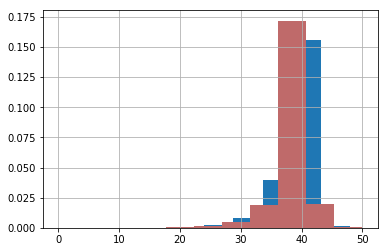

In [21]:
# if needed, execute the command 'pip3 install seaborn'

import seaborn as sns

fb.hist(normed=1, histtype='stepfilled')
ob.hist(normed=1, histtype='stepfilled', color=sns.desaturate("indianred", .75))

The **cumulative distribution function (CDF)**, or just distribution function, describes the probability that a real-valued random variable X with a given probability distribution will be found to have a value less than or equal to x. 

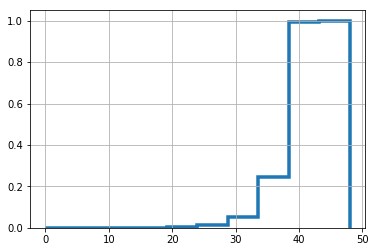

In [22]:
fb.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5)

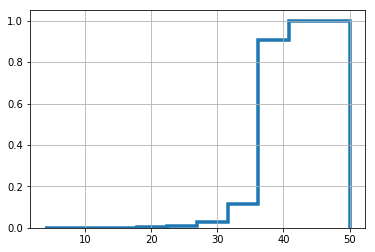

In [23]:
ob.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5)

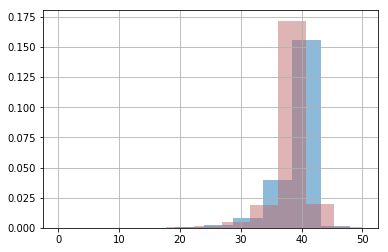

In [24]:
fb.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5)   # default number of bins = 10
ob.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

# Check with 20, 30, 60 bins.

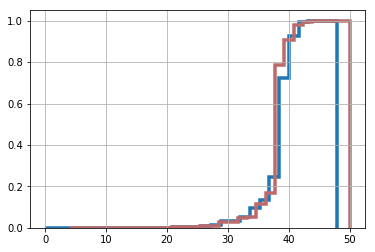

In [25]:
fb.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=30)
ob.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=30, color=sns.desaturate("indianred", .75))

In [26]:
print("The mean sample difference is ", fb.mean() - ob.mean(), "weeks.")

The mean sample difference is  0.07803726677754952 weeks.


## 2.4 Outliers

**Ouliers** are data samples with a value that is far from the central tendency.

We can find outliers by:

+ Computing samples that are *far* from the median.
+ Computing samples whose value *exceeds the mean* by 2 or 3 standard deviations.

In [27]:
df[(df.outcome == 1) & (df['prgLength'] < df['prgLength'].median() - 10)]

,caseId,prgLength,outcome,birthOrd
138,150,9,1,6
157,172,24,1,1
237,253,28,1,1
541,515,18,1,2
628,587,24,1,1
645,600,26,1,1
734,685,28,1,1
1041,928,20,1,1
1114,989,28,1,3
1169,1042,26,1,5


In [28]:
df[(df.outcome == 1) & (df['prgLength'] > df['prgLength'].median() + 6)]

,caseId,prgLength,outcome,birthOrd
2416,2145,48,1,1
4783,4285,50,1,2
4920,4388,48,1,2
6889,6251,48,1,1
6890,6251,48,1,2
7158,6496,48,1,1
7161,6496,48,1,2
7592,6896,48,1,4
8998,8250,50,1,2
11357,10451,47,1,1


If we think that outliers correspond to errors, an option is to trim the data by discarting the highest and lowest values.

In [30]:
df2 = df.drop(df.index[(df.outcome == 1) & 
                       (df['prgLength'] > df['prgLength'].median() + 6)])

df3 = df2.drop(df2.index[(df2.outcome == 1) & 
                         (df2['prgLength'] < df2['prgLength'].median() - 10)])

In [31]:
fb3 = df3[(df3.outcome == 1) & (df3.birthOrd == 1)]

mu3fb = fb3['prgLength'].mean()
std3fb = fb3['prgLength'].std()
md3fb = fb3['prgLength'].median()

print('Before outliers removing: ', mu1, std1, firstbirthmedian, 
          firstbirth['prgLength'].min(), firstbirth['prgLength'].max())
print('After outliers removing: ', mu3fb, std3fb, md3fb, 
          fb3['prgLength'].min(),fb3['prgLength'].max())

Before outliers removing:  38.60095173351461 2.7919014146686947 39.0 0 48
After outliers removing:  38.76212364973569 2.307150203993601 39.0 29 45


In [32]:
ob3 = df3[(df3.outcome == 1) & (df3.birthOrd >= 2)]

mu3ob = ob3['prgLength'].mean()
std3ob = ob3['prgLength'].std()
md3ob = ob3['prgLength'].median()

print('Before outliers removing: ', mu2, std2, othersbirthmedian, 
          othersbirth['prgLength'].min(),othersbirth['prgLength'].max())
print('After outliers removing: ', mu3ob, std3ob, md3ob, 
          ob3['prgLength'].min(), ob3['prgLength'].max())

Before outliers removing:  38.52291446673706 2.615852350439255 39.0 4 50
After outliers removing:  38.658192693868834 2.0951260243080556 39.0 29 45


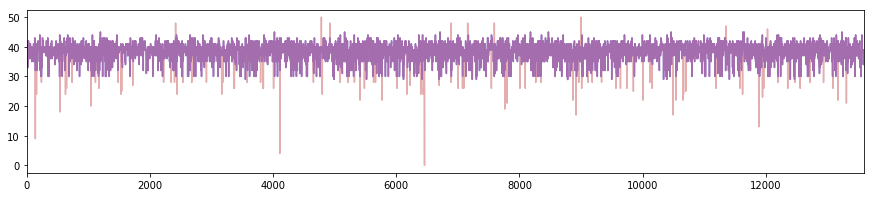

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))

df3.prgLength[(df3.outcome == 1)].plot(alpha=.5, color='blue')
df.prgLength[(df.outcome == 1)].plot(alpha=.5, 
                            color=sns.desaturate("indianred", .95))


Let's see what is happening near the mode:

In [34]:
import numpy as np

countx,divisionx = np.histogram(fb3['prgLength']) 
county,divisiony = np.histogram(ob3['prgLength'])
print (countx-county)


[   5   -2    7    5   23 -102 -509  133  108    2]


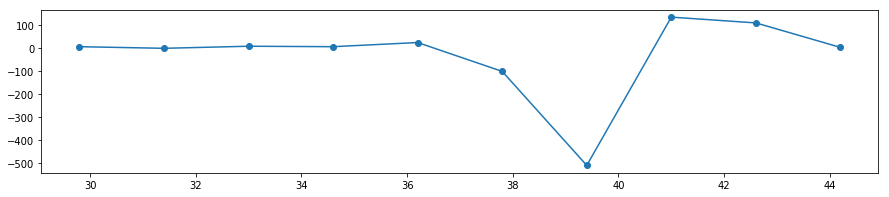

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))
val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-') 

## There is still some evidence for our hypothesis!

### 2.5 Measuring asymmetry.

** Skewness** is a statistic that measures the asymmetry of set of $n$ data samples $x_i$:

$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

The numerator is the mean squared deviation (or variance) and the denominator the mean cubed deviation.

Negative deviation indicates that the distribution "skews left" (it extends farther to the left than to the right).

** Skewness** can be affected by outliers!!! A simpler alternative is to look at the relationship between mean ($\mu$) and median ($\mu_{\frac{1}{2}}$). 

** 2.6 Pearson's median skewness coefficient** is a more robust alternative:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

**Exercise**:

+ Read the file ``run10.txt`` from the ``files`` directory. It represents 16.924 runners who finished the 2012 Cherry Blossom 10 mile run in USA. The file is a ``tab``separated file. It can be read with the pandas ``read_table`` function.
+ Compute the mean time.
+ Compute the difference in mean between men and women.
+ Visualize both distributions (normalized histogram).

**Exercise**: Write a function to compute $g_1$ and $g_p$ of the pregnancy length.

In [36]:
## Your solution here

**Exercises**: 

+ Could you give a real example, where for all data samples, $x_i \leq \mu$? 
+ Could you give a real example, where for all data samples, $x_i \leq \mu_{\frac{1}{2}}$? This is really a distribution that skews left!
+ If we ask to a random group of people "What is your position with respect to the average driver?", what kind of distribution would we get? 

## 2.6 Relative Risk

Let's say that a baby is "early" if it is born during week 37 or earlier, "on time" if it is born during week 38, 39 or 40, and "late" if it is born during week 41 or later. 

Let's compute the probability of being *early*, *on time* and *late* for first babies and the others.

In [ ]:
print("Firsts babies: ")
print('Early: ',len(fb3[fb3['prgLength'] <38])/float(len(fb3.index)))

print('Late: ', len(fb3[fb3['prgLength'] >40])/float(len(fb3.index)))

print('On time: ',len(fb3[(fb3['prgLength'] >37)&(fb3['prgLength'] < 41)])/float(len(fb3.index)))

In [ ]:
print("Other babies:")
print("Early", len(ob3[ob3['prgLength'] <38])/float(len(ob3.index)))

print("Late", len(ob3[ob3['prgLength'] >40])/float(len(ob3.index)))

print("On time", len(ob3[(ob3['prgLength'] >37) &
                        (ob3['prgLength']<41)])/float(len(ob3.index)))

The **relative risk** is the ratio of two probabilities. In our case, the probability that a first baby is born early is 17%. For other babies is 16%, so the relative risk is:

In [ ]:
earlyfb = len(fb3[fb3['prgLength'] <38])/float(len(fb3.index))
earlyob = len(ob3[ob3['prgLength'] <38])/float(len(ob3.index))
print("First babies are about", earlyfb/earlyob, "more likely to be early.")

That means that first babies are about 7% more likely to be early. For the case of late births:

In [ ]:
latefb = len(fb3[fb3['prgLength'] >40])/float(len(fb3))
lateob = len(ob3[ob3['prgLength'] >40])/float(len(ob3))
print("First babies are about", latefb/lateob, "more likely to be late.")

That means that first babies are about 67% more likely to be late. 

## 2.7 A firts glimpse to Conditional Probability

Imagine that someone you know is pregnant and it is the beginning of week 39. What is the chance that the baby will be born in the week 39? What is the chance if it is a first baby?

We can ask these questions by computing a **conditional probability**, $P(X|Y)$.

In our first question, the event $X$ is a birth in week 39 and the event $Y$ is that we know that the baby didn't arrive during weeks 0-38. In the second question, we also know that it is a first baby.

A simple way to compute these chances is to drop from our data the cases that do not fulfill the conditions and then renormalize.

In [ ]:
df4 = df3.drop(df3.index[df3['prgLength'] < 39]) 

We are ready to compute the probability that the baby will be born in the week 39 for a pregnant woman in the beginning of week 39.

In [ ]:
print(len(df4[(df4.prgLength == 39)].index)/float(len(df4)))

Let's now add the second condition.

In [ ]:
fb39 = df4[(df4.birthOrd == 1)]
ob39 = df4[(df4.birthOrd > 1)]

fb39['prgLength'].hist(bins=6,  normed=True, histtype='stepfilled', alpha=.5)   # default number of bins = 10, blue
ob39['prgLength'].hist(bins=6,  normed=True, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))

In [ ]:
print('Probability First baby to be born on week 39:', 
    len(fb39[(fb39.prgLength == 39)].index)/
    float(len(fb39.index)))

In [ ]:
print('Probability non first baby to be born on week 39:',
    len(ob39[(ob39.prgLength == 39)].index)/
    float(len(ob39.index)))


### Discussions.

After exploring the data we have seem some **appearent effects** that seem to support our first hypothesis:

+ **Data description**: The mean pregnant lenght for first babies is 38.76 and for other babies is 38.65.

+ **Relative risk**: First babies are about 67% more likely to be late.

+ **Conditional probability**: If someone is pregnant and it is the beginning of week 39, the chance (63% vs. 72%) that the baby will be born in the week 39 is lower if it is the first baby.


#### Exercises: Other possible experiments

We can compare the first and others for the same woman. While may be unlikely it could still be that a tendency exists for a woman's second, third, etc, child comes earlier.

<small>(Result:  The second baby is born about some hours earlier, but this difference is not *statistically significant*.)<small>


## 3 Probabilities. 
* 3.1 Probability rules
* 3.2 Binomial distribution
* 3.3 Monte Carlo

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. 

    - Thus, it is a real value between 0 and 1 that is intended to be a measure corresponding to the idea that some things are more likely than others.

**Frequentism** because it defines probability in terms of frequencies.

An alternative is **Bayesianism**, which defines probability as a degree of belief that an event will occur.

    - Example: What is the probability that Thaksin Shinawatra is the Prime Minister of Thailand?

The *things* we assign probabilities are called **events**, $E$.  A *situation* where $E$ might or might not happen is called a **trial**.

    - In the case of a six-sided die, each roll is called a **trial**. If we want to compute $P(6)$, each time a 6 appears is called a **success**. Other trials are called **failures**. 

If in a *finite series of $n$ identical trials* we observe $s$ successes, the **probability of the success** is $s/n$.



### 3.1 Probability Rules 


- A rule that is true when $A$ and $B$ are **not independent**: 

$$ P(A|B) = \frac{P(A \mbox{ and } B)}{P(B)}$$
    
    - From that we can derive: 

$$P(A \mbox{ and } B) = P(A) P(B|A) = P(B) P(A|B)$$

- A rule that is true, when $A$ and $B$ are **independent**: $P(A \mbox{ and } B) = P(A) P(B)$. 


$A$ and $B$ are **independent** if the fact that $A$ occurred, does not change the probability of $B$ and viceversa. Trials corresponding to tossing a coin are independent. 

**Exercises**: 
+ If I have two children, what is the probability to have 2 girls?
+ If I have two children and we know that at least one of them is a girl, what is the probability that they are two girls?
+ If I have two children and we know that the older one is a girl, what is the probability that they are two girls?

In [ ]:
## Your solutions

### More probability rules

We say that two events are **mutually exclusive** if:

$$ P(A | B) = P(B | A) = 0 $$

In this case it is easy to show that:

$$ P(A \mbox{ or } B) = P(A) + P(B)$$

If $A$ and $B$ are not mutually exclusive:

$$ P(A \mbox{ or } B) = P(A) + P(B) - P(A \mbox{ and } B) $$

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: For example, if I flip two coins, the chance of getting at least one tail is: 1/2 + 1/2?!
+ Q: If I roll two dices and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?
+ Q: What is the probability of getting at least one six?


In [ ]:
#Your solution here

## 3.2 Binomial distribution

More generally, the probability distribution that represents the probability of getting $k$ times a success with probability $p$ in $n$ trials is:

$$ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where ${n \choose k} = \frac{n!}{k!(n-k)!}$. This is called **binomial distribution**.

What is the probability of having 2 successes in 5 trials?

In [ ]:
import scipy.misc as sc
n = 5
k = 2
print(sc.comb(n, k, exact=True)) # Chances of 2 successes in 5 trials
p=sc.comb(n, k, exact=True)*1/2.0**2*(1-1/2.0)**(5-2)
print(p)

What is the probability of having 5 heads in 9 trials?


In [ ]:
# chances of 5 heads in 9 tosses

a = sc.comb(9, 5, exact=True)
print('The combinations of 9 on 5 are: ', a)

p = 0.5
print('Prob: ', a * p**5 * (1-p)**4)

**Exercise:** What is the probability of having 6 sixes in 9 trials?

​

## 3.3 Monte Carlo Experiments

​

**Monte Carlo experiments** are a broad class of computational algorithms that rely on *repeated random sampling to obtain numerical results*. Typically, one runs simulations many times over and over in order to obtain the distribution of an unknown probabilistic entity. (*Source: Wikipedia*)

​

**Trivial case**: What are the chances of getting a six in one trial?

​

In [ ]:
import random
import sys

N = 1000000 # perform N experiments
M = 0 # number of times, we got 6

for i in range(N):
    outcome = random.randint(1, 6)
    if outcome == 6:
        M += 1

Prob=M/float(N)
print('I got six %d times out of %d' % (M, N), '; Prob = ', 
      Prob, 'Note that: 1/6=', 1/6.0)


What are the chances of getting a six in two trials?

In [ ]:
#  chances of (exactly) 1 six in 2 trials

a = sc.comb(2, 1, exact=True)
p = 1/6.0

print('Prob: ', a * p * (1-p))

In [ ]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6

for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 == 6 and outcome2 !=6) or (outcome1 != 6 and outcome2 == 6):
        M += 1

print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

**Exercise**: You throw two dice, one black and one red. What is the probability that the number of eyes on the black die is larger than the number of eyes on the red die?

In [ ]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6

for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 > outcome2):
        M += 1
        
print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

**A more interesting case:** If I roll a dice 100 times, what is the chance of getting at least 6 sixes in a row?

In [ ]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
T = 100
success='666666'

for i in range(N):
    outcome=''
    for i in range(T):

        outcome=outcome+str(random.randint(1,6))

    #print(outcome)

    if (success in outcome):
            M += 1

print('I got 6 sixes in a row %d times out of %d' % (M, N), 

      '; Prob = ', float(M)/N)

**Exercise**: What is the probability that Messi scores at least 1 goal in a row of 10 matches during a season? (Let's suppose that each match is an independent trial).

**Data**: Messi scores 0.83 goals per match (323 goals in 387 matches) and CR4 scores 0.62 (329 goals in 527 matches) goals per match.

There are 42 matches in a season. 

<small>(Source: https://es.answers.yahoo.com/question/index?qid=20130928103148AAFQHsC)</small>

In [ ]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
T = 42
Messi_score=0.83
Cristiano_score=0.62
success='1111111111'

for i in range(N):
    outcome=''
    for i in range(T):
        res=random.random()
        if res<Cristiano_score:
            outcome=outcome+'1'
        else: outcome=outcome+'0'

    if (success in outcome):
            M += 1

print('Cristiano got scores at least 1 goal in a row of 10 matches during a season %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

### Main reference

*Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.

http://www.greenteapress.com/thinkstats/

